In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## New material

### Attributes have types

In [8]:
full = Table.read_table('nc-est2019-agesex-res.csv')

In [9]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2019')

In [10]:
# Make things easier to read
us_pop_2019 = partial.relabeled(2, '2019')
us_pop_2019.show(5)

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044
0,3,3998665
0,4,4043323


**STOP**

### Some plots for numerical attributes

**Task**: Plot the total population (in millions) as each age increases.

In [ ]:
total_below_999 = us_pop_2019.where('AGE',are.below(999)).where('SEX', 0)
total_below_999 = total_below_999.with_columns('Population (in millions)', total_below_999.column('2019')/1e6) 

In [ ]:
total_below_999.scatter('AGE', 'Population (in millions)')

In [ ]:
total_below_999.plot('AGE', 'Population (in millions)')

_____

**Discussion [1 min]:** What are some things you notice from the below visualization? I see at least two! (1 min)

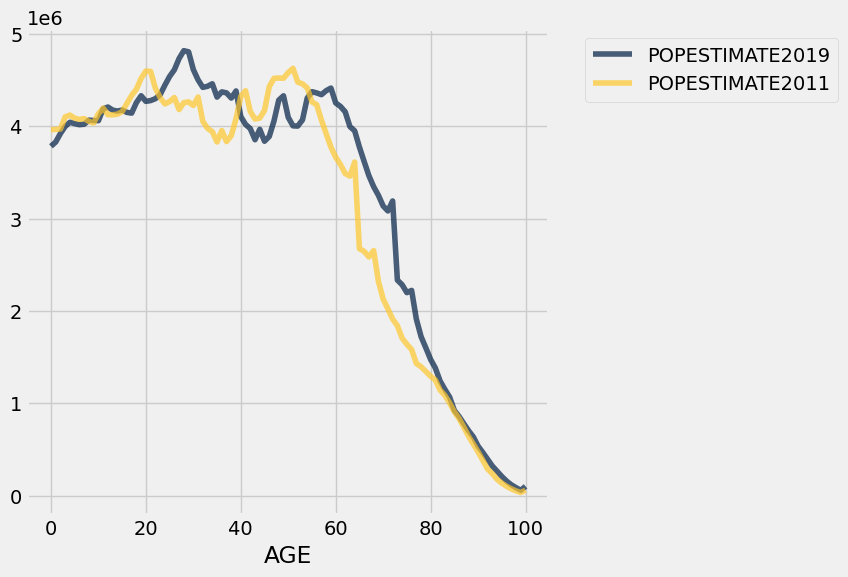

In [11]:
full.select('AGE', 'SEX', 
            'POPESTIMATE2019', 'POPESTIMATE2011').where('AGE',
                                                        are.below(999)).where('SEX',
                                                                              0).drop('SEX').plot('AGE')


______

In [12]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


**Task:** Plot the relationship between the number of movies cast and average salary per movie among famous Hollywood actors.

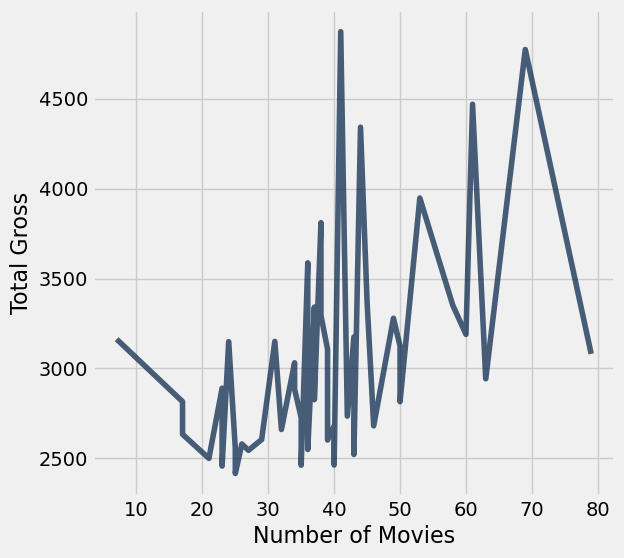

In [13]:
actors.plot('Number of Movies', 'Total Gross')

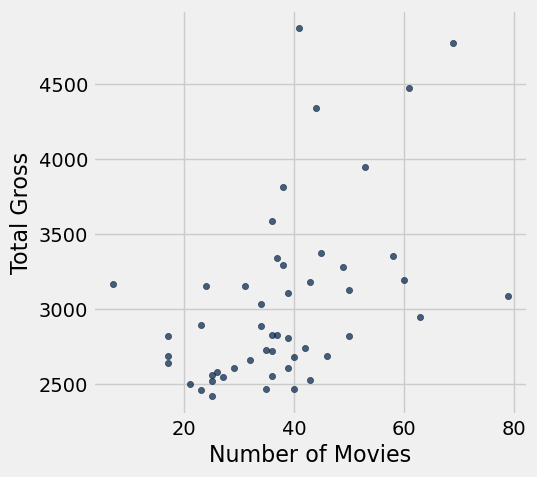

In [14]:
actors.scatter('Number of Movies', 'Total Gross')

**Discussion [30 sec]**: Which of the two above plots is more effective at visualizing the data?

#### Investigate anomalies!!

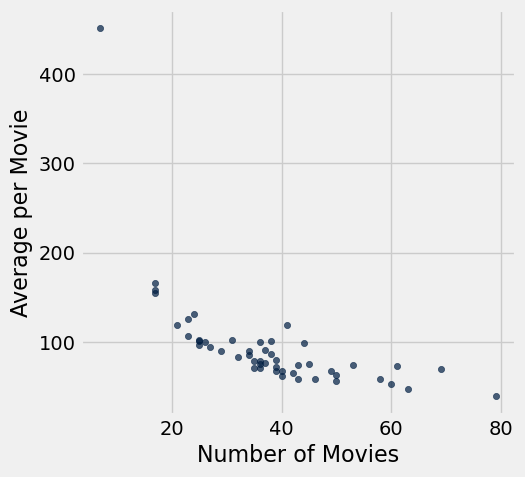

In [15]:
actors.scatter('Number of Movies', 'Average per Movie')

In [16]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


**STOP**

### Plots for categorical data

In [22]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


#### **Task**: Visualize the number of movies released by each studio.

In [24]:
top_movies.group('Studio')

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


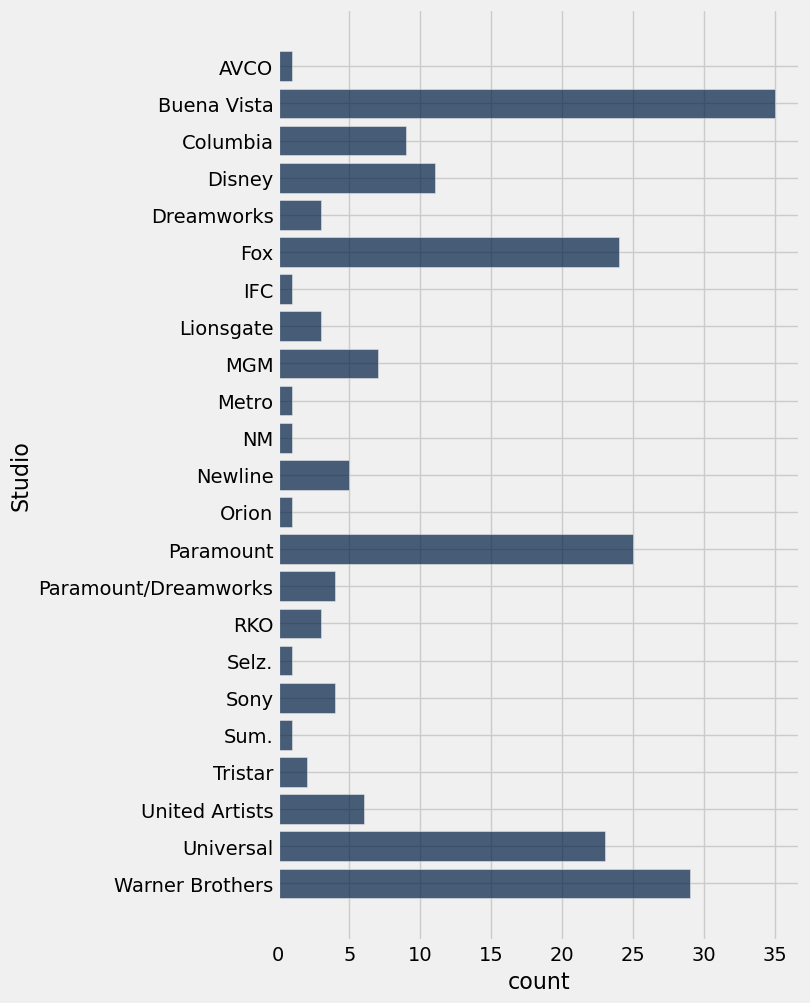

In [25]:
top_movies.group('Studio').barh('Studio')

**Discussion [30 sec]:** How might this plot be improved to show a clearer message about the data? 

#### **Task**: Visualize the top 10 highest adjusted grossing movies by US dollars (in millions).

In [23]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


Convert to millions of dollars for readability

In [19]:
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


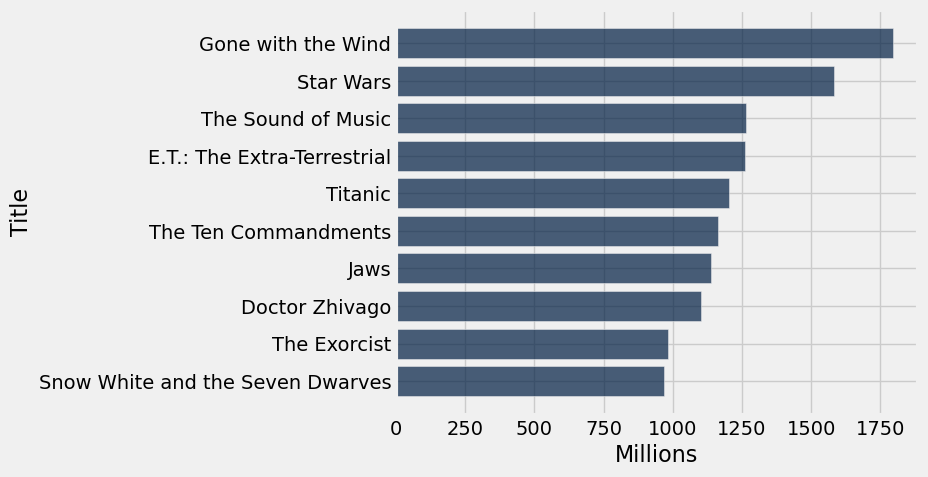

In [20]:
top10_adjusted.barh('Title', 'Millions')

**STOP**

### Good visualization practices

#### Titling plots
- Just add a `print()` statement after your plotting code.

##### Bad title:

In [ ]:
total_below_999.plot('AGE', 'Population (in millions)')
print('US Population in 2019 by age')  

##### Good title:

In [ ]:
total_below_999.plot('AGE', 'Population (in millions)')
print('Population counts in 2019 show a steep decline around age 60')  

## Review

In [ ]:
united_flights = Table.read_table('united.csv')

In [ ]:
united_flights

**Review Question 1.2:** How long was flight 273 to `'SEA'` delayed? 

**Review Question 1.1:** How long was flight 73 to `'HNL'` delayed? 

**Challenge Task**:
- Generate the chart shown in the slides: a bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted).